In [1]:
from linares_plot import *
import sys, os
import statsmodels.formula.api as smf
path_tools = 'C:\\Users\\David\\Documents\\GitHub\\encoding\\scripts\\wm_representation\\functions\\IEM\\tools'
sys.path.insert(1, path_tools)
from timecourse import *
from timecourse_c import *
from scipy import stats
from mlxtend.evaluate import permutation_test



In [2]:
%load_ext autoreload
%autoreload 2

## ¿Cómo decodifico mejor el target: entrenando en el target o en el distractor?

In [3]:
## comment one of the following cells. 
## I make the timecourse just once (repeated in the files "Target_decoding_leaveRUNout_responded" and "Target_decoding_leaveRUNout") 
## I keep the "final" decoding target plot for both. In one it says taregt resp. and in the other it says just target

In [4]:
### (responded y no responded)
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_runsout100.xlsx', 
               'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainD_testT_runsout100.xlsx']

paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testT_runsout100.xlsx', 
                     'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainD_testT_runsout100.xlsx']

In [5]:
df_target=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    decoding_item= path_save_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    training_item = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)
df_target['decoding_item'] = df_target['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_target['training_item'] = df_target['training_item'].replace(['T', 'D'], ['target', 'distractor'])


####################

for PathI in paths_target_shuff:
    path_sh_signal =PathI
    #
    decoding_item= path_sh_signal.split('\\')[-1].split('.')[0].split('_')[3][-1]
    training_item = path_sh_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)
df_target_shuff['decoding_item'] = df_target_shuff['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_target_shuff['training_item'] = df_target_shuff['training_item'].replace(['T', 'D'], ['target', 'distractor'])

In [6]:
df = df_target
df_shuff = df_target_shuff

df_time_target=[]


for cond in ['1_0.2','1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for training_item in ['target', 'distractor']:
                for t in df.times.unique(): 
                    #
                    decoding_item='target'
                    #
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['training_item']==training_item) & 
                           ( df['decoding_item']== decoding_item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['training_item']==training_item)  & 
                           ( df_shuff['decoding_item']== decoding_item) ].decoding
                    #
                    #decoding_ = (dec_sig.decoding.iloc[0]  - dec_shuff.mean()) / dec_shuff.std()
                    decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff.mean()
                    pval_shuff = permutation_test([dec_sig.decoding.iloc[0]], list(dec_shuff), method='approximate', num_rounds=1000, seed=0)
                    #
                    df_time_target.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], training_item, decoding_item, pval_shuff] )   
                    ####)
#
df_time_target = pd.DataFrame(df_time_target)
df_time_target.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'training_item', 'decoding_item', 'pval']

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


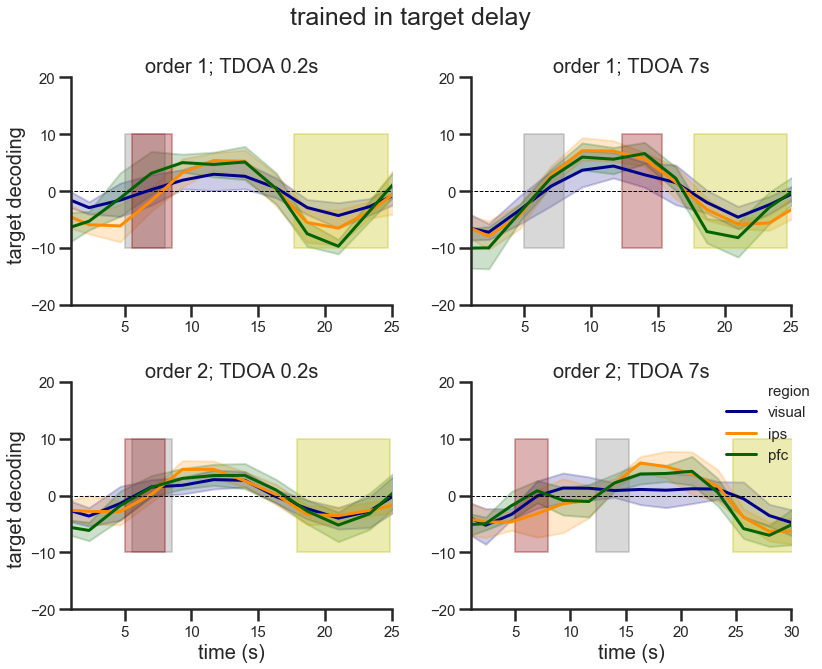

In [34]:
df_x = df_time_target.loc[df_time_target['training_item']=='target']
tiemcourse_c(df_x , 'trained in target delay', ylims=[-20,20])
plt.savefig('C:\\Users\\David\\Desktop\\target_target.svg', transparent=True) ##to save it transparent

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


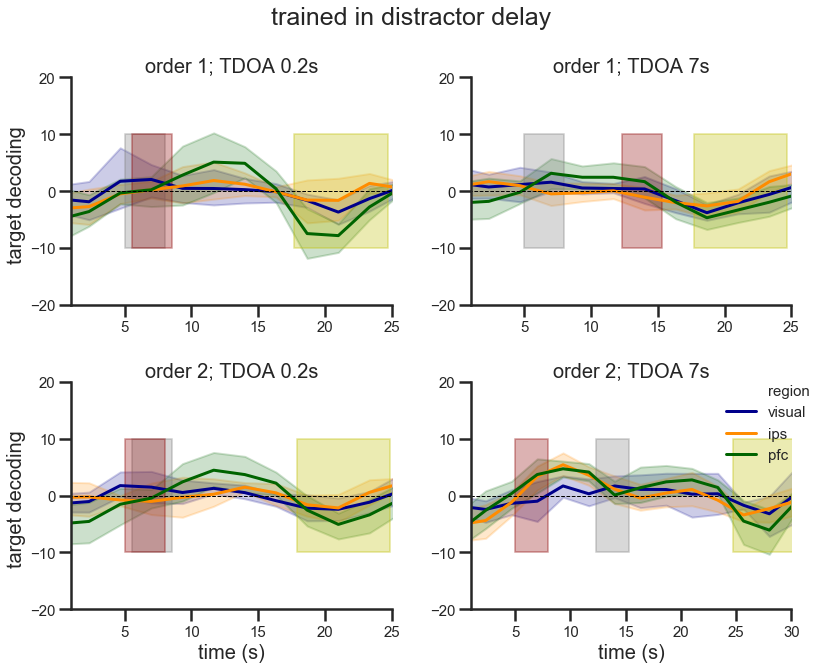

In [35]:
df_x = df_time_target.loc[df_time_target['training_item']=='distractor']
tiemcourse_c(df_x , 'trained in distractor delay', decoding_thing='target', ylims=[-20,20])
plt.savefig('C:\\Users\\David\\Desktop\\target_distractor.svg', transparent=True) ##to save it transparent

##### Juntar todos los TRs de delay de target en cada condición

In [37]:
df_time_target.head()

,times,decoding,region,subject,condition,label,training_item,decoding_item
0,0.000,-1.751196,visual,d001,1_0.2,signal,target,target
1,2.335,-3.036274,visual,d001,1_0.2,signal,target,target
2,4.670,-3.406174,visual,d001,1_0.2,signal,target,target
3,7.005,-0.675985,visual,d001,1_0.2,signal,target,target
4,9.340,5.822757,visual,d001,1_0.2,signal,target,target


In [38]:
df.times.unique()

array([ 0.   ,  2.335,  4.67 ,  7.005,  9.34 , 11.675, 14.01 , 16.345,
       18.68 , 21.015, 23.35 , 25.685, 28.02 , 30.355, 32.69 , 35.025])

In [39]:
c1_02 = df_time_target.loc[(df_time_target['condition']=='1_0.2') & 
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]

c1_7 = df_time_target.loc[(df_time_target['condition']=='1_7') & 
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 11.675) )]

c2_02 = df_time_target.loc[(df_time_target['condition']=='2_0.2') & 
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]

c2_7 = df_time_target.loc[(df_time_target['condition']=='2_7') & 
                   ( (df_time_target['times']>= 16.345) & (df_time_target['times']<= 23.35) )]



df_target_target = pd.concat([c1_02, c1_7, c2_02, c2_7])

In [40]:
df_target_target.head()

,times,decoding,region,subject,condition,label,training_item,decoding_item
4,9.340,5.822757,visual,d001,1_0.2,signal,target,target
5,11.675,6.581603,visual,d001,1_0.2,signal,target,target
6,14.010,1.851185,visual,d001,1_0.2,signal,target,target
7,16.345,-0.572061,visual,d001,1_0.2,signal,target,target
20,9.340,2.853415,visual,d001,1_0.2,signal,distractor,target


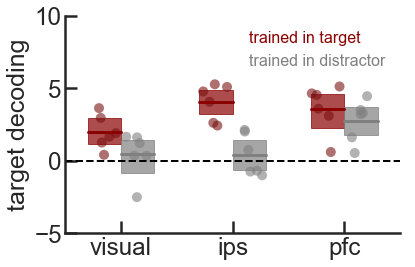

In [41]:
df_target_target['trianed_item_label'] = df_target_target['training_item'].replace(['target', 'distractor'], ['trained in target', 'trained in distractor'])

linares_plot(x='region', y='decoding', hue='trianed_item_label', order=['visual', 'ips', 'pfc'], 
             hue_order=['trained in target', 'trained in distractor'],
            df=df_target_target, 
            palette=['darkred', 'grey'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=500, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
plt.gca().set_ylim(-5,10)
plt.gca().set_yticks([-5,0,5,10])
plt.title('')
plt.savefig('C:\\Users\\David\\Desktop\\decoding_target_comparison.svg', transparent=True) ##to save it transparent

In [26]:
for region in ['visual', 'ips', 'pfc']:
    values_t = df_target_target.loc[(df_target_target['region']==region) & (df_target_target['training_item']=='target')].decoding.values
    values_d = df_target_target.loc[(df_target_target['region']==region) & (df_target_target['training_item']=='distractor') ].decoding.values
    print(region)
    print(stats.ttest_ind(values_t, values_d, equal_var=True) )
    print('')

visual
Ttest_indResult(statistic=3.2525318041256552, pvalue=0.0013856047560255706)

ips
Ttest_indResult(statistic=7.1130549122309095, pvalue=3.2281503866593163e-11)

pfc
Ttest_indResult(statistic=1.4202153928365429, pvalue=0.15742041131176007)



In [18]:
### 1-WE CAN DECODE THE TARGET DURING THE DELAY PERIOD IN ALL THE REGIONS!! (no te olvides de esto please...)
###
### Decoding the target trainig on the distractor is just possible in PFC! 
### Two alternatives here: 
###     1- Visual and IPS have a "sensory based" code por lo que necesiatn el "mejor código posible"
###     2- Visual and IPS tienen dos codigos distintos para target y distractor (saben distinguir)

## Si 1, entonces cuando intente decodificar el distractor, lo harán mejor entrenando en el target
## Si 2, entonces cuando intente decodificar el distractor, lo harán mejor entrenando en el distractor

#### En responded tambien tenemos el mismo resultado (menos fuerte, probablemente porque el testing está hecho en muchos menos trials)

## ¿Cómo decodifico mejor el distractor: entrenando en el target o en el distractor?


In [7]:
##distractors (responded-closest o no responded)
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testD_runsout100.xlsx', 
               'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainD_testD_runsout100.xlsx']

paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testD_runsout100.xlsx', 
                     'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainD_testD_runsout100.xlsx']


In [8]:
df_distractor=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_distractor_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    decoding_item= path_save_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    training_item = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)
df_distractor['decoding_item'] = df_distractor['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_distractor['training_item'] = df_distractor['training_item'].replace(['T', 'D'], ['target', 'distractor'])


####################

for PathI in paths_target_shuff:
    path_sh_signal =PathI
    #
    decoding_item= path_sh_signal.split('\\')[-1].split('.')[0].split('_')[3][-1]
    training_item = path_sh_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)
df_distractor_shuff['decoding_item'] = df_distractor_shuff['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_distractor_shuff['training_item'] = df_distractor_shuff['training_item'].replace(['T', 'D'], ['target', 'distractor'])

In [9]:
df = df_distractor
df_shuff = df_distractor_shuff

df_time_distractor=[]


for cond in ['1_0.2','1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for training_item in ['target', 'distractor']:
                for t in df.times.unique(): 
                    #
                    decoding_item='distractor'
                    #
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['training_item']==training_item) & 
                           ( df['decoding_item']== decoding_item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['training_item']==training_item)  & 
                           ( df_shuff['decoding_item']== decoding_item) ].decoding
                    #
                    #decoding_ = (dec_sig.decoding.iloc[0]  - dec_shuff.mean()) / dec_shuff.std()
                    decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff.mean()
                    pval_shuff = permutation_test([dec_sig.decoding.iloc[0]], list(dec_shuff), method='approximate', num_rounds=1000, seed=0)
                    #
                    df_time_distractor.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], training_item, decoding_item, pval_shuff] )   
                    ####)
#
df_time_distractor = pd.DataFrame(df_time_distractor)
df_time_distractor.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'training_item', 'decoding_item', 'pval']

0.062


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


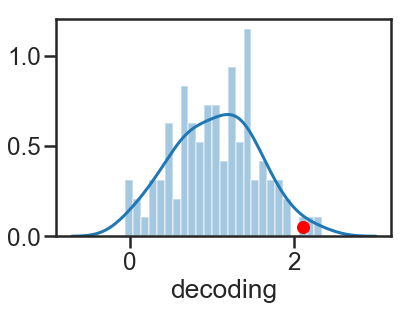

In [64]:
# sns.distplot(dec_shuff, bins=25)
# plt.plot(dec_sig.decoding.iloc[0], 0.05, 'ro')


# p_value = permutation_test([dec_sig.decoding.iloc[0]], list(dec_shuff),
#                            method='approximate',
#                            num_rounds=1000,
#                            seed=0)
# print(p_value)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


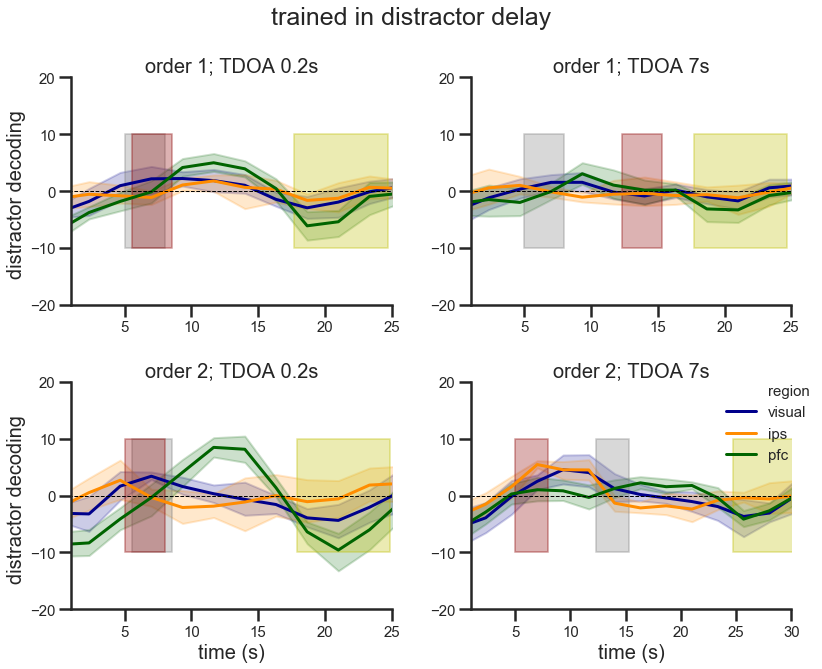

In [55]:
df_x = df_time_distractor.loc[df_time_distractor['training_item']=='distractor']
tiemcourse_c(df_x , 'trained in distractor delay', decoding_thing='distractor', ylims=[-20,20])
plt.savefig('C:\\Users\\David\\Desktop\\distractor_distractor.svg', transparent=True) ##to save it transparent

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


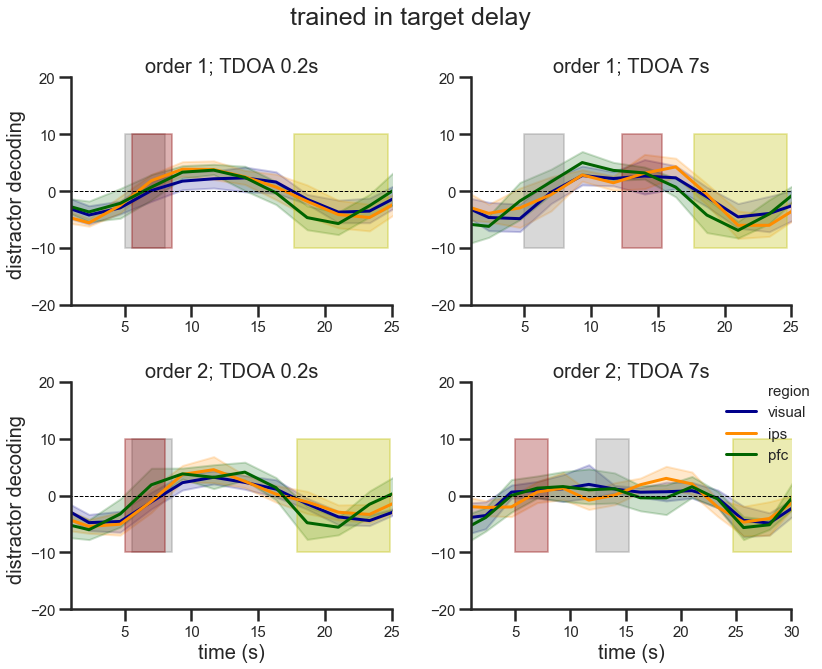

In [56]:
df_x = df_time_distractor.loc[df_time_distractor['training_item']=='target']
tiemcourse_c(df_x , 'trained in target delay', decoding_thing='distractor', ylims=[-20,20])
plt.savefig('C:\\Users\\David\\Desktop\\distractor_target.svg', transparent=True) ##to save it transparent

##### Juntar todos los TRs de delay de distractor en cada condición


In [58]:
c1_02 = df_time_distractor.loc[(df_time_distractor['condition']=='1_0.2') & 
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]

c1_7 = df_time_distractor.loc[(df_time_distractor['condition']=='1_7') & 
                   ( (df_time_distractor['times']>= 14.01) & (df_time_distractor['times']<= 18.68) )]

c2_02 = df_time_distractor.loc[(df_time_distractor['condition']=='2_0.2') & 
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]

c2_7 = df_time_distractor.loc[(df_time_distractor['condition']=='2_7') & 
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 11.675) )]



df_distractor_distractor = pd.concat([c1_02, c1_7, c2_02, c2_7])

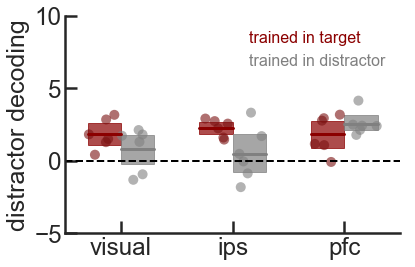

In [59]:
df_distractor_distractor['trianed_item_label'] = df_distractor_distractor['training_item'].replace(['target', 'distractor'], ['trained in target', 'trained in distractor'])

linares_plot(x='region', y='decoding', hue='trianed_item_label', order=['visual', 'ips', 'pfc'], 
             hue_order=['trained in target', 'trained in distractor'],
            df=df_distractor_distractor, 
            palette=['darkred', 'grey'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=500, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('distractor decoding', fontsize=25)# (std. dist.)')
plt.gca().set_ylim(-5,10)
plt.gca().set_yticks([-5,0,5, 10])
plt.title('')
plt.savefig('C:\\Users\\David\\Desktop\\distractor_decoding_comparison.svg', transparent=True) ##to save it transparent

In [60]:
for region in ['visual', 'ips', 'pfc']:
    values_t = df_distractor_distractor.loc[(df_distractor_distractor['region']==region) & (df_distractor_distractor['training_item']=='target')].decoding.values
    values_d = df_distractor_distractor.loc[(df_distractor_distractor['region']==region) & (df_distractor_distractor['training_item']=='distractor') ].decoding.values
    print(region)
    print(stats.ttest_ind(values_t, values_d, equal_var=True) )
    print('')

visual
Ttest_indResult(statistic=2.295047696418499, pvalue=0.023080607517825022)

ips
Ttest_indResult(statistic=3.2523053575712177, pvalue=0.001406634077083837)

pfc
Ttest_indResult(statistic=-1.197058691110538, pvalue=0.2331231249139923)



In [ ]:
### 1-WE CAN DECODE THE DISTRACTOR DURING THE DELAY PERIOD IN ALL THE REGIONS!!
###
### Decoding the distractor trainig on the distractor is just possible in PFC! 
### En visual y en IPS se decodifica cuando entreno en el target. 
### En el punto anterior (decoding target) vimos estas dos alternativas
###     1- Visual and IPS have a "sensory based" code por lo que necesiatn el "mejor código posible"
###     2- Visual and IPS tienen dos codigos distintos para target y distractor (saben distinguir)

## Si 1, entonces cuando intente decodificar el distractor, lo harán mejor entrenando en el target
## Si 2, entonces cuando intente decodificar el distractor, lo harán mejor entrenando en el distractor

#### El resultado es inequívoco (1), no distinguen el distractor y es sensory based
#### El resultado de IPS sugiere que target y distractor comparten el mismo código, como se postula en el Bump attractor model

## Decoding in order 1 vs order 2
#### always training on the target

In [29]:
c1_02 = df_time_distractor.loc[(df_time_distractor['condition']=='1_0.2') & (df_time_distractor['training_item']=='target') &
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]

c1_7 = df_time_distractor.loc[(df_time_distractor['condition']=='1_7') & (df_time_distractor['training_item']=='target') &
                   ( (df_time_distractor['times']>= 14.01) & (df_time_distractor['times']<= 18.68) )]


df_distractor_o1 = pd.concat([c1_02, c1_7])

c1_02 = df_time_target.loc[(df_time_target['condition']=='1_0.2') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]

c1_7 = df_time_target.loc[(df_time_target['condition']=='1_7') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 11.675)  )]


df_target_o1 = pd.concat([c1_02, c1_7])

o1_compar = pd.concat([df_distractor_o1, df_target_o1 ])
o1_compar['order']=1

In [30]:
c2_02 = df_time_distractor.loc[(df_time_distractor['condition']=='2_0.2') & (df_time_distractor['training_item']=='target') &
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]

c2_7 = df_time_distractor.loc[(df_time_distractor['condition']=='2_7') & (df_time_distractor['training_item']=='target') &
                   ( (df_time_distractor['times']>= 9.34 ) & (df_time_distractor['times']<= 11.675 ) )]


df_distractor_o2 = pd.concat([c2_02, c2_7])

c2_02 = df_time_target.loc[(df_time_target['condition']=='2_0.2') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]

c2_7 = df_time_target.loc[(df_time_target['condition']=='2_7') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 14.01) & (df_time_target['times']<= 18.68)  )]


df_target_o2 = pd.concat([c2_02, c2_7])

o2_compar = pd.concat([df_distractor_o2, df_target_o2 ])
o2_compar['order']=2

In [31]:
o1_o2_comp = pd.concat([o1_compar, o2_compar])

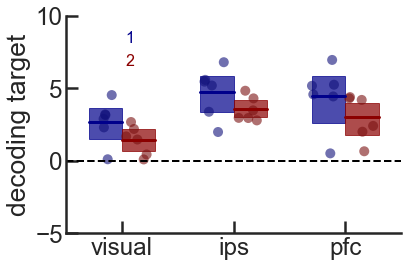

In [32]:
linares_plot(x='region', y='decoding', hue='order', order=['visual', 'ips', 'pfc'], 
             hue_order=[1,2],
            df=o1_o2_comp.loc[o1_o2_comp['decoding_item']=='target'], 
            palette=['darkblue', 'darkred'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding target')# (std. dist.)')
plt.gca().set_ylim(-5,10)
plt.gca().set_yticks([-5,0,5,10])
plt.title('')
plt.show()

In [33]:
from scipy import stats

for region in ['visual', 'ips', 'pfc']:
    values_1 = o1_o2_comp.loc[(o1_o2_comp['region']==region) & (o1_o2_comp['order']==1) & (o1_o2_comp['decoding_item']=='target')].decoding.values
    values_2 = o1_o2_comp.loc[(o1_o2_comp['region']==region) & (o1_o2_comp['order']==2) & (o1_o2_comp['decoding_item']=='target') ].decoding.values
    print(region)
    print(stats.ttest_ind(values_1, values_2, equal_var=True) )
    print('')

visual
Ttest_indResult(statistic=1.8752815244459364, pvalue=0.06459514463870199)

ips
Ttest_indResult(statistic=1.6040129025555419, pvalue=0.11285918055844077)

pfc
Ttest_indResult(statistic=2.1137568894226355, pvalue=0.037817037359388704)



In [34]:
o1_o2_comp['region_'] = o1_o2_comp['region'].replace(['visual', 'ips', 'pfc'], ['a_visual', 'ips', 'pfc'])

res_m = smf.mixedlm(formula='decoding ~ region_ * order', data=o1_o2_comp.loc[(o1_o2_comp['decoding_item']=='target')],
                    groups=o1_o2_comp.loc[(o1_o2_comp['decoding_item']=='target'), 'subject']).fit()
print(res_m.summary())

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   decoding 
No. Observations:     234       Method:               REML     
No. Groups:           6         Scale:                9.0030   
Min. group size:      39        Likelihood:           -588.7988
Max. group size:      39        Converged:            Yes      
Mean group size:      39.0                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             3.973    1.162  3.419 0.001  1.695  6.251
region_[T.ips]        1.945    1.559  1.248 0.212 -1.110  5.000
region_[T.pfc]        2.004    1.559  1.286 0.198 -1.051  5.059
order                -1.273    0.681 -1.868 0.062 -2.609  0.063
region_[T.ips]:order  0.091    0.964  0.094 0.925 -1.798  1.980
region_[T.pfc]:order -0.217    0.964 -0.226 0.821 -2.

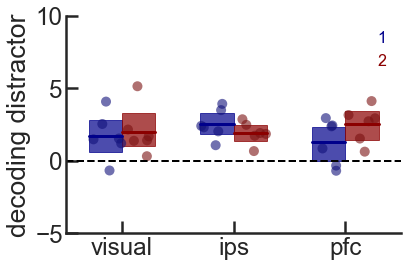

In [35]:
linares_plot(x='region', y='decoding', hue='order', order=['visual', 'ips', 'pfc'], 
             hue_order=[1,2],
            df=o1_o2_comp.loc[o1_o2_comp['decoding_item']=='distractor'], 
            palette=['darkblue', 'darkred'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding distractor')# (std. dist.)')
plt.gca().set_ylim(-5,10)
plt.gca().set_yticks([-5,0,5,10])
plt.title('')
plt.show()

In [36]:
from scipy import stats

for region in ['visual', 'ips', 'pfc']:
    values_1 = o1_o2_comp.loc[(o1_o2_comp['region']==region) & (o1_o2_comp['order']==1) & (o1_o2_comp['decoding_item']=='distractor')].decoding.values
    values_2 = o1_o2_comp.loc[(o1_o2_comp['region']==region) & (o1_o2_comp['order']==2) & (o1_o2_comp['decoding_item']=='distractor') ].decoding.values
    print(region)
    print(stats.ttest_ind(values_1, values_2, equal_var=True) )
    print('')

visual
Ttest_indResult(statistic=-0.5206141815391858, pvalue=0.6041490414080795)

ips
Ttest_indResult(statistic=0.922539752946423, pvalue=0.35916663674844085)

pfc
Ttest_indResult(statistic=-1.6449238026887805, pvalue=0.10411574147100322)



In [37]:
o1_o2_comp['region_'] = o1_o2_comp['region'].replace(['visual', 'ips', 'pfc'], ['a_visual', 'ips', 'pfc'])

res_m = smf.mixedlm(formula='decoding ~ region_ * order', data=o1_o2_comp.loc[(o1_o2_comp['decoding_item']=='distractor')],
                    groups=o1_o2_comp.loc[(o1_o2_comp['decoding_item']=='distractor'), 'subject']).fit()
print(res_m.summary())

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   decoding 
No. Observations:     234       Method:               REML     
No. Groups:           6         Scale:                8.9733   
Min. group size:      39        Likelihood:           -585.8413
Max. group size:      39        Converged:            Yes      
Mean group size:      39.0                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             1.379    1.062  1.299 0.194 -0.702  3.460
region_[T.ips]        1.785    1.486  1.201 0.230 -1.128  4.697
region_[T.pfc]       -1.362    1.486 -0.917 0.359 -4.274  1.550
order                 0.319    0.680  0.469 0.639 -1.014  1.653
region_[T.ips]:order -0.940    0.962 -0.977 0.328 -2.826  0.946
region_[T.pfc]:order  0.932    0.962  0.969 0.333 -0.

# TDOA: Distractor decoding
### El efecto de TDOA está presente en el behaviour! (más distractor para short TDOA)
Hay dos preguntas a resolver:  
   ***1- qué area muestra este efecto de SOA??  
   2- el efecto de SOA es debido a un "boost" del target o a una supression del distractor?***

In [27]:
c1_02 = df_time_distractor.loc[(df_time_distractor['condition']=='1_0.2') & (df_time_distractor['training_item']=='target') &
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]
c1_02['order']=1
c1_02['delay']=0.2
c1_02['deco'] = 'distractor'

c1_7 = df_time_distractor.loc[(df_time_distractor['condition']=='1_7') & (df_time_distractor['training_item']=='target') &
                   ( (df_time_distractor['times']>= 14.01) & (df_time_distractor['times']<= 18.68) )]
c1_7['order']=1
c1_7['delay']=7
c1_7['deco'] = 'distractor'

c2_02 = df_time_distractor.loc[(df_time_distractor['condition']=='2_0.2') & (df_time_distractor['training_item']=='target') &
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]
c2_02['order']=2
c2_02['delay']=0.2
c2_02['deco'] = 'distractor'

c2_7 = df_time_distractor.loc[(df_time_distractor['condition']=='2_7') & (df_time_distractor['training_item']=='target') &
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 11.675 ) )] #
c2_7['order']=2
c2_7['delay']=7
c2_7['deco'] = 'distractor'

conditions_dist = pd.concat([c1_02, c1_7, c2_02, c2_7 ])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

(-5, 10)

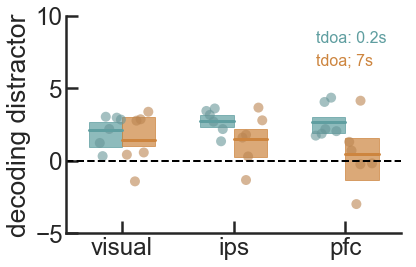

In [45]:
conditions_dist['delay_label'] = conditions_dist['delay'].replace([0.2, 7], ['tdoa: 0.2s', 'tdoa; 7s'])

linares_plot(x='region', y='decoding', hue='delay_label', hue_order=['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor')], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=10, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding distractor')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')
plt.gca().set_ylim(-5,10)

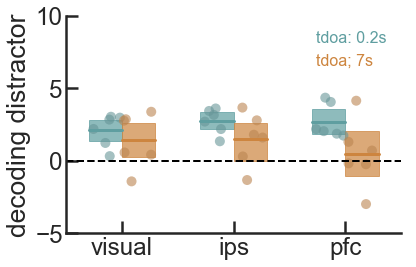

In [45]:
conditions_dist['delay_label'] = conditions_dist['delay'].replace([0.2, 7], ['tdoa: 0.2s', 'tdoa; 7s'])

linares_plot(x='region', y='decoding', hue='delay_label', hue_order=['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor')], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=200, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding distractor')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')
plt.gca().set_ylim(-5,10)
##plt.savefig('C:\\Users\\David\\Desktop\\tdoa_differences_distractor.svg', transparent=True) ##to save it transparent

In [29]:
from scipy import stats

for region in ['visual', 'ips', 'pfc']:
    values_02 = conditions_dist.loc[(conditions_dist['region']==region) & (conditions_dist['delay']==0.2) ].decoding.values
    values_7 = conditions_dist.loc[(conditions_dist['region']==region) & (conditions_dist['delay']==7) ].decoding.values
    print(region)
    print(stats.ttest_ind(values_02, values_7, equal_var=True) )
    print('')

visual
Ttest_indResult(statistic=1.0711859197027644, pvalue=0.2874758119446672)

ips
Ttest_indResult(statistic=1.8708767875148493, pvalue=0.06521152560782209)

pfc
Ttest_indResult(statistic=2.9985816915012493, pvalue=0.0036646104309936323)



In [46]:
from scipy import stats

for region in ['visual', 'ips', 'pfc']:
    values_02 = conditions_dist.loc[(conditions_dist['region']==region) & (conditions_dist['delay']==0.2) ].decoding.values
    values_7 = conditions_dist.loc[(conditions_dist['region']==region) & (conditions_dist['delay']==7) ].decoding.values
    print(region)
    print(stats.ttest_ind(values_02, values_7, equal_var=True) )
    print('')

visual
Ttest_indResult(statistic=1.0711859197027644, pvalue=0.2874758119446672)

ips
Ttest_indResult(statistic=1.8708767875148493, pvalue=0.06521152560782209)

pfc
Ttest_indResult(statistic=2.9985816915012493, pvalue=0.0036646104309936323)



In [41]:
conditions_dist['region_'] = conditions_dist['region'].replace(['visual', 'ips', 'pfc'], ['a_visual', 'ips', 'pfc'])

res_m = smf.mixedlm(formula='decoding ~ region_ * delay', data=conditions_dist.loc[(conditions_dist['deco']=='distractor')],
                    groups=conditions_dist.loc[(conditions_dist['deco']=='distractor'), 'subject']).fit()
print(res_m.summary())

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   decoding 
No. Observations:     234       Method:               REML     
No. Groups:           6         Scale:                8.5627   
Min. group size:      39        Likelihood:           -586.2964
Max. group size:      39        Converged:            Yes      
Mean group size:      39.0                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             2.122    0.463  4.582 0.000  1.214  3.030
region_[T.ips]        0.659    0.615  1.071 0.284 -0.547  1.865
region_[T.pfc]        0.654    0.615  1.063 0.288 -0.552  1.860
delay                -0.098    0.100 -0.982 0.326 -0.295  0.098
region_[T.ips]:delay -0.088    0.142 -0.624 0.533 -0.366  0.189
region_[T.pfc]:delay -0.232    0.142 -1.640 0.101 -0.

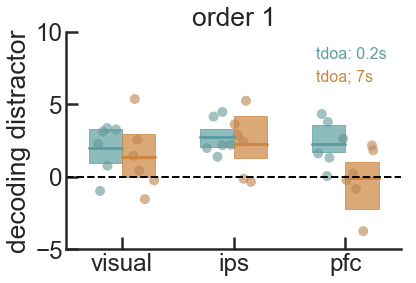

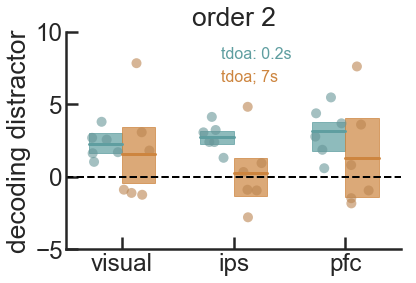

In [13]:
## In order 1 is where we have the stronger beh effects.

linares_plot(x='region', y='decoding', hue='delay_label', hue_order=['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor') & (conditions_dist['order']==1)], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=10, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding distractor')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1')
plt.gca().set_ylim(-5,10)
plt.show()


## In order 2 is where we have the weaker beh effects.

linares_plot(x='region', y='decoding', hue='delay_label', hue_order=['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor') & (conditions_dist['order']==2)], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=10, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding distractor')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2')
plt.gca().set_ylim(-5,10)
plt.show()



In [21]:
df_time_target.times.unique()

array([ 0.   ,  2.335,  4.67 ,  7.005,  9.34 , 11.675, 14.01 , 16.345,
       18.68 , 21.015, 23.35 , 25.685, 28.02 , 30.355, 32.69 , 35.025])

In [22]:
##new
c1_02 = df_time_target.loc[(df_time_target['condition']=='1_0.2') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]
c1_02['order']=1
c1_02['delay']=0.2
c1_02['deco'] = 'target'

c1_7 = df_time_target.loc[(df_time_target['condition']=='1_7') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<=14.01) )]
c1_7['order']=1
c1_7['delay']=7
c1_7['deco'] = 'target'

c2_02 = df_time_target.loc[(df_time_target['condition']=='2_0.2') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]
c2_02['order']=2
c2_02['delay']=0.2
c2_02['deco'] = 'target'

c2_7 = df_time_target.loc[(df_time_target['condition']=='2_7') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 16.345) & (df_time_target['times']<=  21.015 ) )] #
c2_7['order']=2
c2_7['delay']=7
c2_7['deco'] = 'target'

conditions_targ = pd.concat([c1_02, c1_7, c2_02, c2_7 ])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [ ]:
c1_02 = df_time_target.loc[(df_time_target['condition']=='1_0.2') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]
c1_02['order']=1
c1_02['delay']=0.2
c1_02['deco'] = 'target'

c1_7 = df_time_target.loc[(df_time_target['condition']=='1_7') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<=14.01) )]
c1_7['order']=1
c1_7['delay']=7
c1_7['deco'] = 'target'

c2_02 = df_time_target.loc[(df_time_target['condition']=='2_0.2') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]
c2_02['order']=2
c2_02['delay']=0.2
c2_02['deco'] = 'target'

c2_7 = df_time_target.loc[(df_time_target['condition']=='2_7') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 14.01 ) & (df_time_target['times']<=  18.68 ) )] #
c2_7['order']=2
c2_7['delay']=7
c2_7['deco'] = 'target'

conditions_targ = pd.concat([c1_02, c1_7, c2_02, c2_7 ])

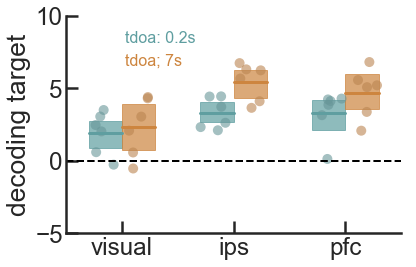

In [51]:
conditions_targ['delay_label'] = conditions_targ['delay'].replace([0.2, 7], ['tdoa: 0.2s', 'tdoa; 7s'])


linares_plot(x='region', y='decoding', hue='delay_label', hue_order= ['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_targ.loc[(conditions_targ['deco']=='target')], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=200, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding target')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')
plt.gca().set_ylim(-5,10)


In [44]:
from scipy import stats

for region in ['visual', 'ips', 'pfc']:
    values_02 = conditions_targ.loc[(conditions_targ['region']==region) & (conditions_targ['delay']==0.2) ].decoding.values
    values_7 = conditions_targ.loc[(conditions_targ['region']==region) & (conditions_targ['delay']==7) ].decoding.values
    print(region)
    print(stats.ttest_ind(values_02, values_7, equal_var=True) )
    print('')

visual
Ttest_indResult(statistic=-0.6164784718859219, pvalue=0.5392865276150638)

ips
Ttest_indResult(statistic=-3.2478923360393286, pvalue=0.0016857440352543137)

pfc
Ttest_indResult(statistic=-1.9915780580128926, pvalue=0.04974636587799111)



In [45]:
conditions_targ['region_'] = conditions_targ['region'].replace(['visual', 'ips', 'pfc'], ['a_visual', 'ips', 'pfc'])

res_m = smf.mixedlm(formula='decoding ~ region_ * delay', data=conditions_targ.loc[(conditions_targ['deco']=='target')],
                    groups=conditions_targ.loc[(conditions_targ['deco']=='target'), 'subject']).fit()
print(res_m.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   decoding 
No. Observations:   252       Method:               REML     
No. Groups:         6         Scale:                8.8789   
Min. group size:    42        Likelihood:           -638.4085
Max. group size:    42        Converged:            Yes      
Mean group size:    42.0                                     
-------------------------------------------------------------
                     Coef. Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept            1.887    0.569 3.316 0.001  0.772  3.002
region_[T.ips]       1.328    0.626 2.119 0.034  0.100  2.555
region_[T.pfc]       1.371    0.626 2.188 0.029  0.143  2.599
delay                0.061    0.097 0.632 0.527 -0.128  0.250
region_[T.ips]:delay 0.259    0.137 1.897 0.058 -0.009  0.527
region_[T.pfc]:delay 0.143    0.137 1.049 0.294 -0.125  0.411
Group Var           

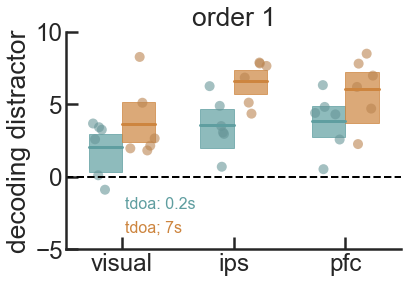

visual
Ttest_indResult(statistic=-1.6534307410105864, pvalue=0.1060716114085711)

ips
Ttest_indResult(statistic=-3.038517757540551, pvalue=0.004175972672144447)

pfc
Ttest_indResult(statistic=-2.1015383161813648, pvalue=0.04193929465229941)



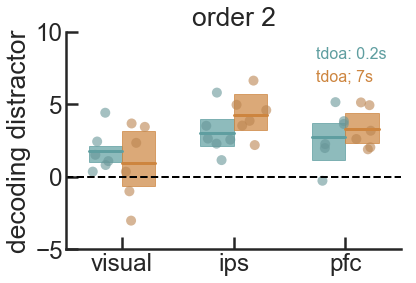

visual
Ttest_indResult(statistic=0.946440697177265, pvalue=0.3496065298745753)

ips
Ttest_indResult(statistic=-1.5494213395462884, pvalue=0.12915714819020235)

pfc
Ttest_indResult(statistic=-0.6587320201083959, pvalue=0.5138420917267579)



In [18]:
conditions_targ['delay_label'] = conditions_targ['delay'].replace([0.2, 7], ['tdoa: 0.2s', 'tdoa; 7s'])


## In order 1 is where we have the stronger beh effects.

linares_plot(x='region', y='decoding', hue='delay_label', hue_order=['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_targ.loc[(conditions_targ['deco']=='target') & (conditions_targ['order']==1)], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=10, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding distractor')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1')
plt.gca().set_ylim(-5,10)
plt.show()

from scipy import stats

for region in ['visual', 'ips', 'pfc']:
    values_02 = conditions_targ.loc[(conditions_targ['region']==region)  & (conditions_targ['order']==1) &  (conditions_targ['delay']==0.2) ].decoding.values
    values_7 = conditions_targ.loc[(conditions_targ['region']==region) & (conditions_targ['order']==1) & (conditions_targ['delay']==7) ].decoding.values
    print(region)
    print(stats.ttest_ind(values_02, values_7, equal_var=True) )
    print('')



## In order 2 is where we have the weaker beh effects.

linares_plot(x='region', y='decoding', hue='delay_label', hue_order=['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_targ.loc[(conditions_targ['deco']=='target') & (conditions_targ['order']==2)], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=10, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding distractor')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2')
plt.gca().set_ylim(-5,10)
plt.show()


from scipy import stats

for region in ['visual', 'ips', 'pfc']:
    values_02 = conditions_targ.loc[(conditions_targ['region']==region)  & (conditions_targ['order']==2) &  (conditions_targ['delay']==0.2) ].decoding.values
    values_7 = conditions_targ.loc[(conditions_targ['region']==region) & (conditions_targ['order']==2) & (conditions_targ['delay']==7) ].decoding.values
    print(region)
    print(stats.ttest_ind(values_02, values_7, equal_var=True) )
    print('')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


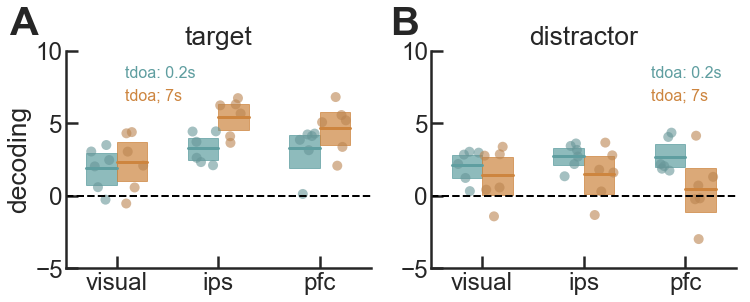

In [54]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)



f.text(0.06, 0.97, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)
f.text(0.5, 0.97, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)



plt.subplot(121)

linares_plot(x='region', y='decoding', hue='delay_label', hue_order= ['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_targ.loc[(conditions_targ['deco']=='target')], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=200, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('target')
plt.gca().set_ylim(-5,10)

plt.subplot(122)

linares_plot(x='region', y='decoding', hue='delay_label', hue_order=['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor')], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=200, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('distractor')
plt.gca().set_ylim(-5,10)

plt.savefig('C:\\Users\\David\\Desktop\\tdoa_differences_fmri.svg', transparent=True) ##to save it transparent

***pfc muestra un efecto de SOA mas en la linea de lo que se ve en performance, 
con mayor presencia del distractor en la condición que distrae más.***  

***Ahora falta ver si esto es por un "target boost" además de por la distractor supression que hemos visto***

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


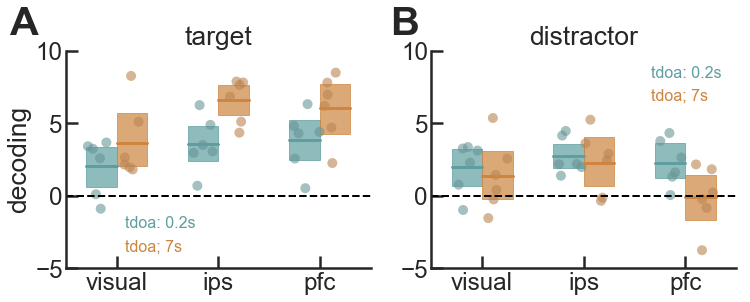

In [19]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)



f.text(0.06, 0.97, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)
f.text(0.5, 0.97, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)



plt.subplot(121)

linares_plot(x='region', y='decoding', hue='delay_label', hue_order= ['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_targ.loc[(conditions_targ['deco']=='target') & (conditions_targ['order']==1)], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=200, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('target')
plt.gca().set_ylim(-5,10)

plt.subplot(122)

linares_plot(x='region', y='decoding', hue='delay_label', hue_order=['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor') & (conditions_dist['order']==1)], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=200, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('distractor')
plt.gca().set_ylim(-5,10)

plt.savefig('C:\\Users\\David\\Desktop\\tdoa_differences_fmri_order1.svg', transparent=True) ##to save it transparent

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\David\Anaconda3\envs\python3\lib\site-p

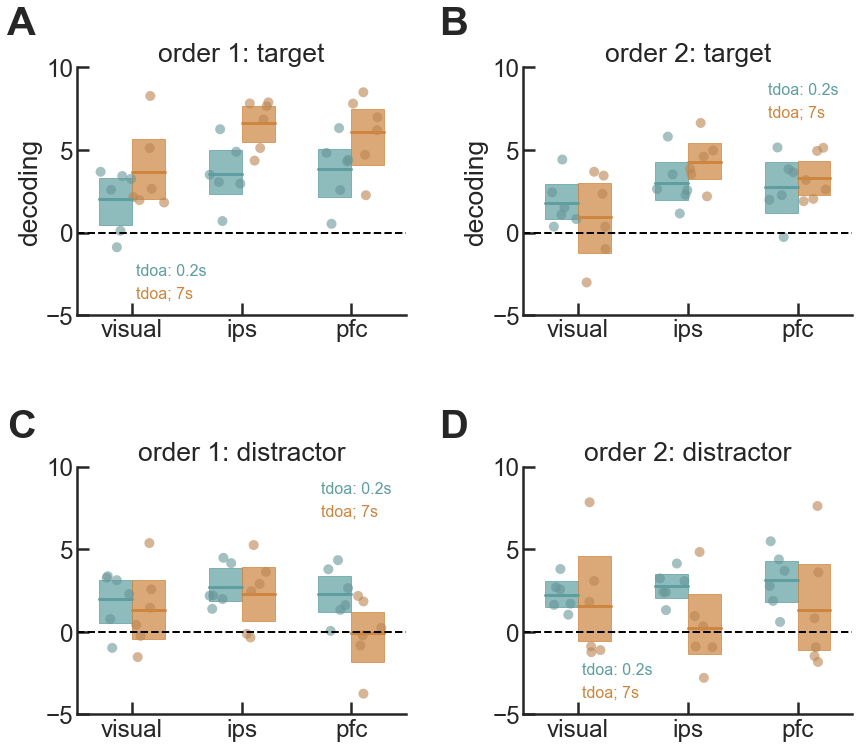

In [40]:
f = plt.figure(figsize=(12,10))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)



f.text(0.0, 1.01, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)
f.text(0.5, 1.01, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)
f.text(0.0, 0.45, "C", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)
f.text(0.5, 0.45, "D", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)


plt.subplot(221)

linares_plot(x='region', y='decoding', hue='delay_label', hue_order= ['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_targ.loc[(conditions_targ['deco']=='target') & (conditions_targ['order']==1)], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=300, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1: target')
plt.gca().set_ylim(-5,10)


plt.subplot(222)

linares_plot(x='region', y='decoding', hue='delay_label', hue_order= ['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_targ.loc[(conditions_targ['deco']=='target') & (conditions_targ['order']==2)], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=300, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2: target')
plt.gca().set_ylim(-5,10)


plt.subplot(223)

linares_plot(x='region', y='decoding', hue='delay_label', hue_order=['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor') & (conditions_dist['order']==1)], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=300, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1: distractor')
plt.gca().set_ylim(-5,10)


plt.subplot(224)

linares_plot(x='region', y='decoding', hue='delay_label', hue_order=['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor') & (conditions_dist['order']==2)], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=300, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2: distractor')
plt.gca().set_ylim(-5,10)

plt.tight_layout(h_pad=10, w_pad=5)

plt.savefig('C:\\Users\\David\\Desktop\\tdoa_differences_fmri_order1-order2.svg', transparent=True) ##to save it transparent

In [51]:
print('Target decoding')

print('ORDER 1')
for region in ['visual', 'ips', 'pfc']:
    values_02 = conditions_targ.loc[(conditions_targ['region']==region)  & (conditions_targ['order']==1) &  (conditions_targ['delay']==0.2) ].decoding.values
    values_7 = conditions_targ.loc[(conditions_targ['region']==region) & (conditions_targ['order']==1) & (conditions_targ['delay']==7) ].decoding.values
    print(region)
    print(stats.ttest_ind(values_02, values_7, equal_var=True) )
    
print('')
print('ORDER 2')
for region in ['visual', 'ips', 'pfc']:
    values_02 = conditions_targ.loc[(conditions_targ['region']==region)  & (conditions_targ['order']==2) &  (conditions_targ['delay']==0.2) ].decoding.values
    values_7 = conditions_targ.loc[(conditions_targ['region']==region) & (conditions_targ['order']==2) & (conditions_targ['delay']==7) ].decoding.values
    print(region)
    print(stats.ttest_ind(values_02, values_7, equal_var=True) )
    

Target decoding
ORDER 1
visual
Ttest_indResult(statistic=-1.6534307410105864, pvalue=0.1060716114085711)
ips
Ttest_indResult(statistic=-3.038517757540551, pvalue=0.004175972672144447)
pfc
Ttest_indResult(statistic=-2.1015383161813648, pvalue=0.04193929465229941)

ORDER 2
visual
Ttest_indResult(statistic=0.7755244708355199, pvalue=0.4425909024260063)
ips
Ttest_indResult(statistic=-1.9351235832760154, pvalue=0.06006769803006152)
pfc
Ttest_indResult(statistic=-1.4383551430384403, pvalue=0.15811205555788463)


In [52]:
print('Distractor decoding')
print('ORDER 1')
for region in ['visual', 'ips', 'pfc']:
    values_02 = conditions_dist.loc[(conditions_dist['region']==region)  & (conditions_dist['order']==1) &  (conditions_dist['delay']==0.2) ].decoding.values
    values_7 = conditions_dist.loc[(conditions_dist['region']==region) & (conditions_dist['order']==1) & (conditions_dist['delay']==7) ].decoding.values
    print(region)
    print(stats.ttest_ind(values_02, values_7, equal_var=True) )
    
print('')
print('ORDER 2')
for region in ['visual', 'ips', 'pfc']:
    values_02 = conditions_dist.loc[(conditions_dist['region']==region)  & (conditions_dist['order']==2) &  (conditions_dist['delay']==0.2) ].decoding.values
    values_7 = conditions_dist.loc[(conditions_dist['region']==region) & (conditions_dist['order']==2) & (conditions_dist['delay']==7) ].decoding.values
    print(region)
    print(stats.ttest_ind(values_02, values_7, equal_var=True) )

Distractor decoding
ORDER 1
visual
Ttest_indResult(statistic=0.7071796086706988, pvalue=0.48355474029630163)
ips
Ttest_indResult(statistic=0.4692445866245057, pvalue=0.6414425910559065)
pfc
Ttest_indResult(statistic=2.2543510635003345, pvalue=0.029720222058620186)

ORDER 2
visual
Ttest_indResult(statistic=0.7366294734047023, pvalue=0.4664003968179108)
ips
Ttest_indResult(statistic=2.579386428328509, pvalue=0.014394994851884639)
pfc
Ttest_indResult(statistic=1.7287393053198183, pvalue=0.09292811692070939)


In [32]:
print('Distractor decoding')
print('ORDER 1')
for region in ['visual', 'ips', 'pfc']:
    values_02 = conditions_dist.loc[(conditions_dist['region']==region)  & (conditions_dist['order']==1) &  (conditions_dist['delay']==0.2) ].decoding.values
    values_7 = conditions_dist.loc[(conditions_dist['region']==region) & (conditions_dist['order']==1) & (conditions_dist['delay']==7) ].decoding.values
    print(region)
    print(stats.ttest_ind(values_02, values_7, equal_var=True) )
    
print('')
print('ORDER 2')
for region in ['visual', 'ips', 'pfc']:
    values_02 = conditions_dist.loc[(conditions_dist['region']==region)  & (conditions_dist['order']==2) &  (conditions_dist['delay']==0.2) ].decoding.values
    values_7 = conditions_dist.loc[(conditions_dist['region']==region) & (conditions_dist['order']==2) & (conditions_dist['delay']==7) ].decoding.values
    print(region)
    print(stats.ttest_ind(values_02, values_7, equal_var=True) )

Distractor decoding
ORDER 1
visual
Ttest_indResult(statistic=0.7071796086706988, pvalue=0.48355474029630163)
ips
Ttest_indResult(statistic=0.4692445866245057, pvalue=0.6414425910559065)
pfc
Ttest_indResult(statistic=2.2543510635003345, pvalue=0.029720222058620186)

ORDER 2
visual
Ttest_indResult(statistic=0.7366294734047023, pvalue=0.4664003968179108)
ips
Ttest_indResult(statistic=2.579386428328509, pvalue=0.014394994851884639)
pfc
Ttest_indResult(statistic=1.7287393053198183, pvalue=0.09292811692070939)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\David\Anaconda3\envs\python3\lib\site-p

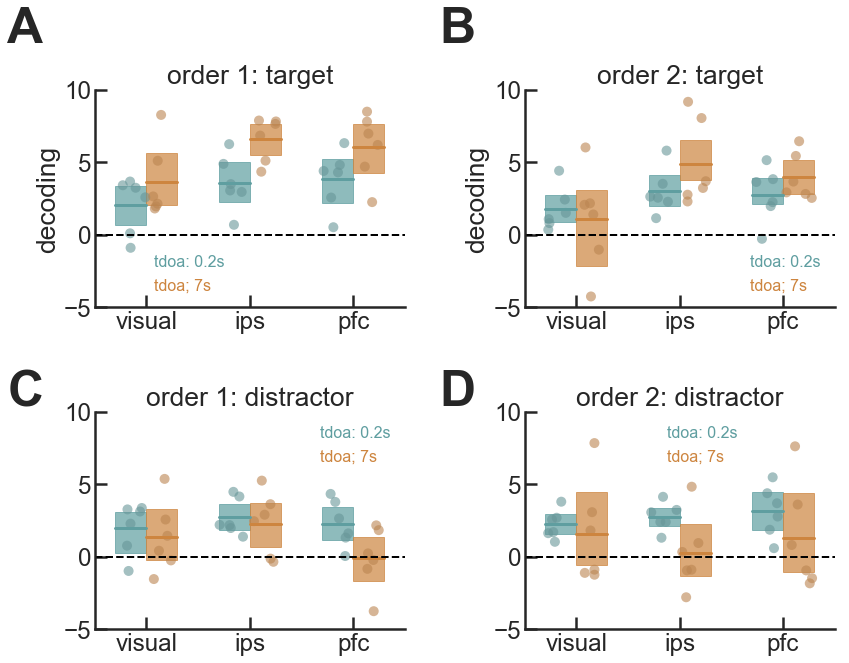

In [50]:
f = plt.figure(figsize=(12,9))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)



f.text(0.0, 1.01, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=50)
f.text(0.5, 1.01, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=50)
f.text(0.0, 0.45, "C", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=50)
f.text(0.5, 0.45, "D", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=50)


plt.subplot(221)

linares_plot(x='region', y='decoding', hue='delay_label', hue_order= ['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_targ.loc[(conditions_targ['deco']=='target') & (conditions_targ['order']==1)], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=300, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1: target')
plt.gca().set_ylim(-5,10)


plt.subplot(222)

linares_plot(x='region', y='decoding', hue='delay_label', hue_order= ['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_targ.loc[(conditions_targ['deco']=='target') & (conditions_targ['order']==2)], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=10, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2: target')
plt.gca().set_ylim(-5,10)


plt.subplot(223)

linares_plot(x='region', y='decoding', hue='delay_label', hue_order=['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor') & (conditions_dist['order']==1)], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=300, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1: distractor')
plt.gca().set_ylim(-5,10)


plt.subplot(224)

linares_plot(x='region', y='decoding', hue='delay_label', hue_order=['tdoa: 0.2s', 'tdoa; 7s'], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor') & (conditions_dist['order']==2)], 
            palette=['cadetblue', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=300, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2: distractor')
plt.gca().set_ylim(-5,10)

plt.tight_layout(h_pad=2, w_pad=2)

plt.savefig('C:\\Users\\David\\Desktop\\tdoa_differences_fmri_order1-order2_2.svg', transparent=True) ##to save it transparent

### Básica: me sirve el delay 1_7 en el target para decodificar el target en el resto?   
### Básica: me sirve el delay 2_7 en el distractor para decodificar el target en el resto?

In [33]:
df_time_target.times.unique()

array([ 0.   ,  2.335,  4.67 ,  7.005,  9.34 , 11.675, 14.01 , 16.345,
       18.68 , 21.015, 23.35 , 25.685, 28.02 , 30.355, 32.69 , 35.025])

In [34]:
c1_02 = df_time_target.loc[(df_time_target['condition']=='1_0.2') & 
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]
c1_02['order']=1
c1_02['delay']=0.2
c1_02['deco'] = 'target'

c1_7 = df_time_target.loc[(df_time_target['condition']=='1_7') & 
                   ( (df_time_target['times']>= 9.34 ) & (df_time_target['times']<= 11.675 ) )]
c1_7['order']=1
c1_7['delay']=7
c1_7['deco'] = 'target'

c2_02 = df_time_target.loc[(df_time_target['condition']=='2_0.2') & 
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]
c2_02['order']=2
c2_02['delay']=0.2
c2_02['deco'] = 'target'

c2_7 = df_time_target.loc[(df_time_target['condition']=='2_7') & 
                   ( (df_time_target['times']>= 16.345) & (df_time_target['times']<= 23.35) )]
c2_7['order']=2
c2_7['delay']=7
c2_7['deco'] = 'target'

conditions_target = pd.concat([c1_02, c1_7, c2_02, c2_7 ])

conditions_target['condition_label'] = conditions_target['condition'].replace(['1_0.2', '1_7', '2_0.2', '2_7'],   ['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [35]:
### esteee es el good diria
# c1_02 = df_time_target.loc[(df_time_target['condition']=='1_0.2') & 
#                    ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]
# c1_02['order']=1
# c1_02['delay']=0.2
# c1_02['deco'] = 'target'

# c1_7 = df_time_target.loc[(df_time_target['condition']=='1_7') & 
#                    ( (df_time_target['times']>= 9.34 ) & (df_time_target['times']<= 11.675 ) )]
# c1_7['order']=1
# c1_7['delay']=7
# c1_7['deco'] = 'target'

# c2_02 = df_time_target.loc[(df_time_target['condition']=='2_0.2') & 
#                    ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]
# c2_02['order']=2
# c2_02['delay']=0.2
# c2_02['deco'] = 'target'

# c2_7 = df_time_target.loc[(df_time_target['condition']=='2_7') & 
#                    ( (df_time_target['times']>= 14.01) & (df_time_target['times']<= 18.68) )]
# c2_7['order']=2
# c2_7['delay']=7
# c2_7['deco'] = 'target'

# conditions_target = pd.concat([c1_02, c1_7, c2_02, c2_7 ])

# conditions_target['condition_label'] = conditions_target['condition'].replace(['1_0.2', '1_7', '2_0.2', '2_7'],   ['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7'])

In [36]:
conditions_target

,times,decoding,region,subject,condition,label,training_item,decoding_item,pval,order,delay,deco,condition_label
4,9.340,5.822757,visual,d001,1_0.2,signal,target,target,0.000,1,0.2,target,o:1 tdoa:0.2
5,11.675,6.581603,visual,d001,1_0.2,signal,target,target,0.000,1,0.2,target,o:1 tdoa:0.2
6,14.010,1.851185,visual,d001,1_0.2,signal,target,target,0.002,1,0.2,target,o:1 tdoa:0.2
7,16.345,-0.572061,visual,d001,1_0.2,signal,target,target,0.084,1,0.2,target,o:1 tdoa:0.2
20,9.340,2.853415,visual,d001,1_0.2,signal,distractor,target,0.000,1,0.2,target,o:1 tdoa:0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,23.350,-3.749219,pfc,r001,2_7,signal,target,target,0.000,2,7.0,target,o:2 tdoa:7
2295,16.345,-1.862588,pfc,r001,2_7,signal,distractor,target,0.001,2,7.0,target,o:2 tdoa:7
2296,18.680,-0.525729,pfc,r001,2_7,signal,distractor,target,0.280,2,7.0,target,o:2 tdoa:7
2297,21.015,4.025276,pfc,r001,2_7,signal,distractor,target,0.000,2,7.0,target,o:2 tdoa:7


In [14]:
# conditions_target['condition'] = conditions_target['condition'].replace(['1_0.2', '1_7', '2_0.2', '2_7'], 
#                                                       ['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7'])

# linares_plot(x='region', y='decoding', hue='condition', order=['visual', 'ips', 'pfc'], 
#             hue_order=['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7'],
#             df=conditions_target, 
#             palette=['darkblue', 'lightblue', 'darkred', 'lightcoral'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
#              reps=10, alpha_box=0.7, alpha=0.6,  point_size=8, leg=True, sep_axis=False, L_size=17, leg_inside=(0.9, 0.5))
# plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
# plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
# plt.gca().get_xaxis().tick_bottom()                                                                                         
# plt.gca().get_yaxis().tick_left()
# plt.gca().tick_params(direction='in') #direction
# plt.xlabel('')
# plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
# plt.ylabel('decoding target')
# plt.gca().set_ylim(-5,10)
# plt.gca().set_yticks([0,5,10])
# plt.title('')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


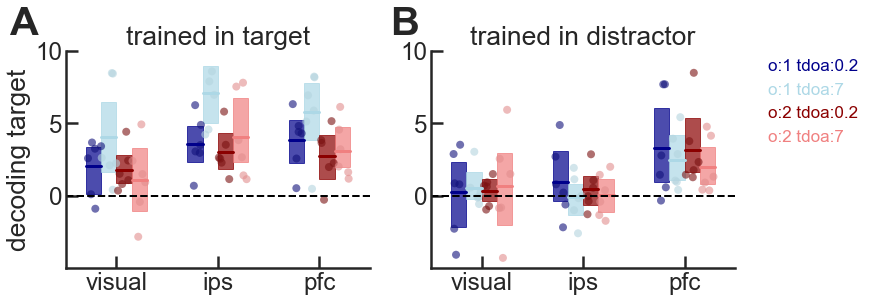

In [37]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)



f.text(0.06, 0.97, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)
f.text(0.5, 0.97, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)



plt.subplot(121)

linares_plot(x='region', y='decoding', hue='condition_label', order=['visual', 'ips', 'pfc'], 
            hue_order=['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7'],
            df=conditions_target.loc[conditions_target['training_item']=='target'], 
            palette=['darkblue', 'lightblue', 'darkred', 'lightcoral'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=8, leg=False, sep_axis=False, L_size=0)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding target')
plt.gca().set_ylim(-5,10)
plt.gca().set_yticks([0,5,10])
plt.title('trained in target')
plt.gca().get_legend().remove()


plt.subplot(122)


linares_plot(x='region', y='decoding', hue='condition_label', order=['visual', 'ips', 'pfc'], 
            hue_order=['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7'],
            df=conditions_target.loc[conditions_target['training_item']=='distractor'], 
            palette=['darkblue', 'lightblue', 'darkred', 'lightcoral'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=8, leg=True, sep_axis=False, L_size=17, leg_inside=(0.9, 0.5))
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('')
plt.gca().set_ylim(-5,10)
plt.gca().set_yticks([0,5,10])
plt.title('trained in distractor')

plt.savefig('C:\\Users\\David\\Desktop\\decoding_target_condition_mean2.svg', transparent=True )

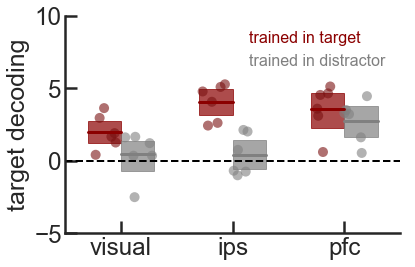

In [54]:
##new
conditions_target['trianed_item_label'] = conditions_target['training_item'].replace(['target', 'distractor'], ['trained in target', 'trained in distractor'])

linares_plot(x='region', y='decoding', hue='trianed_item_label', order=['visual', 'ips', 'pfc'], 
             hue_order=['trained in target', 'trained in distractor'],
            df=conditions_target, 
            palette=['darkred', 'grey'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=500, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
plt.gca().set_ylim(-5,10)
plt.gca().set_yticks([-5,0,5,10])
plt.title('')
plt.savefig('C:\\Users\\David\\Desktop\\decoding_target_comparison2.svg', transparent=True) ##to save it transparent

In [57]:
##new
for region in ['visual', 'ips', 'pfc']:
    print(region)    
    jj = conditions_target.loc[(conditions_target['training_item']=='target') & (conditions_target['region']==region) ].decoding.values
    print(region )
    ii = conditions_target.loc[(conditions_target['training_item']=='distractor') & (conditions_target['region']==region) ].decoding.values
    print(stats.ttest_ind(jj, ii))
    print('')
    

visual
visual
Ttest_indResult(statistic=3.2525318041256552, pvalue=0.0013856047560255706)

ips
ips
Ttest_indResult(statistic=7.1130549122309095, pvalue=3.2281503866593163e-11)

pfc
pfc
Ttest_indResult(statistic=1.4202153928365429, pvalue=0.15742041131176007)



In [38]:
##new
for region in ['visual', 'ips', 'pfc']:
    print(region)
    for condit in ['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7']:
        jj = conditions_target.loc[(conditions_target['training_item']=='target') & (conditions_target['region']==region) &
                              (conditions_target['condition_label']==condit)].decoding.values
        print(region + ' ' + condit)
        print(stats.ttest_1samp(jj, popmean=0.0))
    print('')
    

visual
visual o:1 tdoa:0.2
Ttest_1sampResult(statistic=3.4152601801377216, pvalue=0.002369228529336592)
visual o:1 tdoa:7
Ttest_1sampResult(statistic=3.8227475285705745, pvalue=0.00282966348212856)
visual o:2 tdoa:0.2
Ttest_1sampResult(statistic=3.911114047602668, pvalue=0.0007013199579568582)
visual o:2 tdoa:7
Ttest_1sampResult(statistic=1.6370080635750202, pvalue=0.1152400523706637)

ips
ips o:1 tdoa:0.2
Ttest_1sampResult(statistic=4.695843815761471, pvalue=9.934084918471051e-05)
ips o:1 tdoa:7
Ttest_1sampResult(statistic=9.42225038844227, pvalue=1.3354922062305427e-06)
ips o:2 tdoa:0.2
Ttest_1sampResult(statistic=5.382556888485129, pvalue=1.8149975102182222e-05)
ips o:2 tdoa:7
Ttest_1sampResult(statistic=5.21880987172699, pvalue=2.7152923105589567e-05)

pfc
pfc o:1 tdoa:0.2
Ttest_1sampResult(statistic=5.077536055022128, pvalue=3.84932664189567e-05)
pfc o:1 tdoa:7
Ttest_1sampResult(statistic=6.170484043941216, pvalue=7.001599176799341e-05)
pfc o:2 tdoa:0.2
Ttest_1sampResult(statistic

In [39]:
## new
for region in ['visual', 'ips', 'pfc']:
    print(region)
    for condit in ['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7']:
        jj = conditions_target.loc[(conditions_target['training_item']=='distractor') & (conditions_target['region']==region) &
                              (conditions_target['condition_label']==condit)].decoding.values
        print(region + ' ' + condit)
        print(stats.ttest_1samp(jj, popmean=0.0))
    print('')

visual
visual o:1 tdoa:0.2
Ttest_1sampResult(statistic=0.45921720907683766, pvalue=0.6503888687980877)
visual o:1 tdoa:7
Ttest_1sampResult(statistic=1.275967275686397, pvalue=0.22825127849401167)
visual o:2 tdoa:0.2
Ttest_1sampResult(statistic=0.881671865166214, pvalue=0.38707569675023346)
visual o:2 tdoa:7
Ttest_1sampResult(statistic=0.7669248741749717, pvalue=0.450927279142899)

ips
ips o:1 tdoa:0.2
Ttest_1sampResult(statistic=1.4318623423977466, pvalue=0.1656336027961298)
ips o:1 tdoa:7
Ttest_1sampResult(statistic=-0.1914353084198802, pvalue=0.8516723808005744)
ips o:2 tdoa:0.2
Ttest_1sampResult(statistic=0.7514404395802793, pvalue=0.46000816151012236)
ips o:2 tdoa:7
Ttest_1sampResult(statistic=0.09376196978507616, pvalue=0.9261102571822595)

pfc
pfc o:1 tdoa:0.2
Ttest_1sampResult(statistic=2.82464490142918, pvalue=0.009609401388505193)
pfc o:1 tdoa:7
Ttest_1sampResult(statistic=2.8464293025368703, pvalue=0.015897960264758322)
pfc o:2 tdoa:0.2
Ttest_1sampResult(statistic=3.889297278

In [40]:
# new
print('visual: target decoding - trained target')
for condit in ['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7']:
    print('')
    print('')
    for s in ['n001', 'd001', 'r001', 'b001', 's001', 'l001']:
        jj = conditions_target.loc[(conditions_target['training_item']=='target') & (conditions_target['region']=='visual') &
                              (conditions_target['condition_label']==condit) & (conditions_target['subject']==s)]

        sum(jj.decoding.values>0)
        print(s + ' ' + condit + ' ' + str(sum(jj.pval.values[jj.decoding.values>0]<0.05) / len(jj) *100))


#######################################################
print('')
print('')
print('parietal: target decoding - trained target')
for condit in ['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7']:
    print('')
    print('')
    for s in ['n001', 'd001', 'r001', 'b001', 's001', 'l001']:
        jj = conditions_target.loc[(conditions_target['training_item']=='target') & (conditions_target['region']=='ips') &
                              (conditions_target['condition_label']==condit) & (conditions_target['subject']==s)]

        sum(jj.decoding.values>0)
        print(s + ' ' + condit + ' ' + str(sum(jj.pval.values[jj.decoding.values>0]<0.05) / len(jj) *100))
        
########################################################
print('')
print('')
print('frontal: target decoding - trained target')
for condit in ['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7']:
    print('')
    print('')
    for s in ['n001', 'd001', 'r001', 'b001', 's001', 'l001']:
        jj = conditions_target.loc[(conditions_target['training_item']=='target') & (conditions_target['region']=='pfc') &
                              (conditions_target['condition_label']==condit) & (conditions_target['subject']==s)]

        sum(jj.decoding.values>0)
        print(s + ' ' + condit + ' ' + str(sum(jj.pval.values[jj.decoding.values>0]<0.05) / len(jj) *100))

visual: target decoding - trained target


n001 o:1 tdoa:0.2 100.0
d001 o:1 tdoa:0.2 75.0
r001 o:1 tdoa:0.2 50.0
b001 o:1 tdoa:0.2 75.0
s001 o:1 tdoa:0.2 25.0
l001 o:1 tdoa:0.2 75.0


n001 o:1 tdoa:7 50.0
d001 o:1 tdoa:7 100.0
r001 o:1 tdoa:7 100.0
b001 o:1 tdoa:7 100.0
s001 o:1 tdoa:7 100.0
l001 o:1 tdoa:7 50.0


n001 o:2 tdoa:0.2 100.0
d001 o:2 tdoa:0.2 75.0
r001 o:2 tdoa:0.2 75.0
b001 o:2 tdoa:0.2 100.0
s001 o:2 tdoa:0.2 25.0
l001 o:2 tdoa:0.2 50.0


n001 o:2 tdoa:7 25.0
d001 o:2 tdoa:7 50.0
r001 o:2 tdoa:7 100.0
b001 o:2 tdoa:7 75.0
s001 o:2 tdoa:7 50.0
l001 o:2 tdoa:7 100.0


parietal: target decoding - trained target


n001 o:1 tdoa:0.2 100.0
d001 o:1 tdoa:0.2 75.0
r001 o:1 tdoa:0.2 50.0
b001 o:1 tdoa:0.2 100.0
s001 o:1 tdoa:0.2 50.0
l001 o:1 tdoa:0.2 75.0


n001 o:1 tdoa:7 100.0
d001 o:1 tdoa:7 100.0
r001 o:1 tdoa:7 100.0
b001 o:1 tdoa:7 100.0
s001 o:1 tdoa:7 100.0
l001 o:1 tdoa:7 100.0


n001 o:2 tdoa:0.2 100.0
d001 o:2 tdoa:0.2 50.0
r001 o:2 tdoa:0.2 75.0
b001 o:2 tdoa:0.2 100

In [41]:
#new
print('visual: target decoding - trained distractor')
for condit in ['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7']:
    print('')
    print('')
    for s in ['n001', 'd001', 'r001', 'b001', 's001', 'l001']:
        jj = conditions_target.loc[(conditions_target['training_item']=='distractor') & (conditions_target['region']=='visual') &
                              (conditions_target['condition_label']==condit) & (conditions_target['subject']==s)]

        sum(jj.decoding.values>0)
        print(s + ' ' + condit + ' ' + str(sum(jj.pval.values[jj.decoding.values>0]<0.05) / len(jj) *100))


#######################################################
print('')
print('')
print('parietal: target decoding - trained distractor')
for condit in ['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7']:
    print('')
    print('')
    for s in ['n001', 'd001', 'r001', 'b001', 's001', 'l001']:
        jj = conditions_target.loc[(conditions_target['training_item']=='distractor') & (conditions_target['region']=='ips') &
                              (conditions_target['condition_label']==condit) & (conditions_target['subject']==s)]

        sum(jj.decoding.values>0)
        print(s + ' ' + condit + ' ' + str(sum(jj.pval.values[jj.decoding.values>0]<0.05) / len(jj) *100))
        
########################################################
print('')
print('')
print('frontal: target decoding - trained distractor')
for condit in ['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7']:
    print('')
    print('')
    for s in ['n001', 'd001', 'r001', 'b001', 's001', 'l001']:
        jj = conditions_target.loc[(conditions_target['training_item']=='distractor') & (conditions_target['region']=='pfc') &
                              (conditions_target['condition_label']==condit) & (conditions_target['subject']==s)]

        sum(jj.decoding.values>0)
        print(s + ' ' + condit + ' ' + str(sum(jj.pval.values[jj.decoding.values>0]<0.05) / len(jj) *100))
        

visual: target decoding - trained distractor


n001 o:1 tdoa:0.2 0.0
d001 o:1 tdoa:0.2 100.0
r001 o:1 tdoa:0.2 0.0
b001 o:1 tdoa:0.2 25.0
s001 o:1 tdoa:0.2 100.0
l001 o:1 tdoa:0.2 75.0


n001 o:1 tdoa:7 0.0
d001 o:1 tdoa:7 50.0
r001 o:1 tdoa:7 50.0
b001 o:1 tdoa:7 0.0
s001 o:1 tdoa:7 50.0
l001 o:1 tdoa:7 100.0


n001 o:2 tdoa:0.2 25.0
d001 o:2 tdoa:0.2 25.0
r001 o:2 tdoa:0.2 25.0
b001 o:2 tdoa:0.2 75.0
s001 o:2 tdoa:0.2 0.0
l001 o:2 tdoa:0.2 75.0


n001 o:2 tdoa:7 100.0
d001 o:2 tdoa:7 50.0
r001 o:2 tdoa:7 25.0
b001 o:2 tdoa:7 0.0
s001 o:2 tdoa:7 50.0
l001 o:2 tdoa:7 100.0


parietal: target decoding - trained distractor


n001 o:1 tdoa:0.2 50.0
d001 o:1 tdoa:0.2 50.0
r001 o:1 tdoa:0.2 75.0
b001 o:1 tdoa:0.2 25.0
s001 o:1 tdoa:0.2 50.0
l001 o:1 tdoa:0.2 75.0


n001 o:1 tdoa:7 100.0
d001 o:1 tdoa:7 50.0
r001 o:1 tdoa:7 0.0
b001 o:1 tdoa:7 50.0
s001 o:1 tdoa:7 0.0
l001 o:1 tdoa:7 50.0


n001 o:2 tdoa:0.2 50.0
d001 o:2 tdoa:0.2 50.0
r001 o:2 tdoa:0.2 75.0
b001 o:2 tdoa:0.2 0.0
s001 o:2 td

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'trained in distractor')

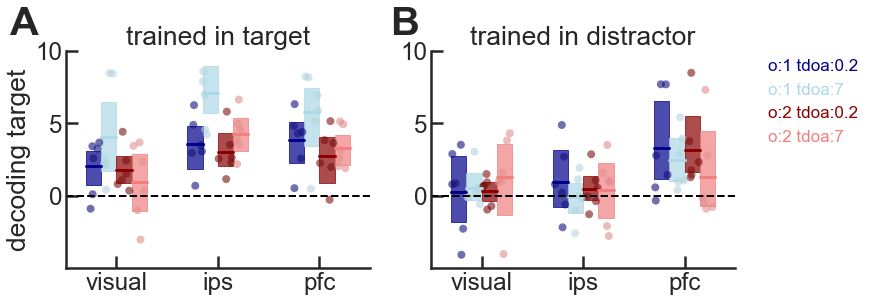

In [21]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)



f.text(0.06, 0.97, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)
f.text(0.5, 0.97, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)



plt.subplot(121)

linares_plot(x='region', y='decoding', hue='condition_label', order=['visual', 'ips', 'pfc'], 
            hue_order=['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7'],
            df=conditions_target.loc[conditions_target['training_item']=='target'], 
            palette=['darkblue', 'lightblue', 'darkred', 'lightcoral'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=8, leg=False, sep_axis=False, L_size=0)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding target')
plt.gca().set_ylim(-5,10)
plt.gca().set_yticks([0,5,10])
plt.title('trained in target')
plt.gca().get_legend().remove()


plt.subplot(122)


linares_plot(x='region', y='decoding', hue='condition_label', order=['visual', 'ips', 'pfc'], 
            hue_order=['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7'],
            df=conditions_target.loc[conditions_target['training_item']=='distractor'], 
            palette=['darkblue', 'lightblue', 'darkred', 'lightcoral'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=8, leg=True, sep_axis=False, L_size=17, leg_inside=(0.9, 0.5))
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('')
plt.gca().set_ylim(-5,10)
plt.gca().set_yticks([0,5,10])
plt.title('trained in distractor')

#plt.savefig('C:\\Users\\David\\Desktop\\decoding_target_condition_mean.svg', transparent=True )

### Básica: me sirve el delay 1_7 en el target para decodificar el distrcator en el resto?  
### Básica: me sirve el delay 2_7 en el distractor para decodificar el distractor  en el resto?

In [58]:
c1_02 = df_time_distractor.loc[(df_time_distractor['condition']=='1_0.2') & 
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]
c1_02['order']=1
c1_02['delay']=0.2
c1_02['deco'] = 'dist'

c1_7 = df_time_distractor.loc[(df_time_distractor['condition']=='1_7') & 
                   ( (df_time_distractor['times']>= 14.01 ) & (df_time_distractor['times']<= 18.68 ) )]
c1_7['order']=1
c1_7['delay']=7
c1_7['deco'] = 'dist'

c2_02 = df_time_distractor.loc[(df_time_distractor['condition']=='2_0.2') & 
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]
c2_02['order']=2
c2_02['delay']=0.2
c2_02['deco'] = 'dist'

c2_7 = df_time_distractor.loc[(df_time_distractor['condition']=='2_7') & 
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 11.675) )]
c2_7['order']=2
c2_7['delay']=7
c2_7['deco'] = 'dist'

conditions_distractor = pd.concat([c1_02, c1_7, c2_02, c2_7 ])

conditions_distractor['condition_label'] = conditions_distractor['condition'].replace(['1_0.2', '1_7', '2_0.2', '2_7'],   ['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'trained in distractor')

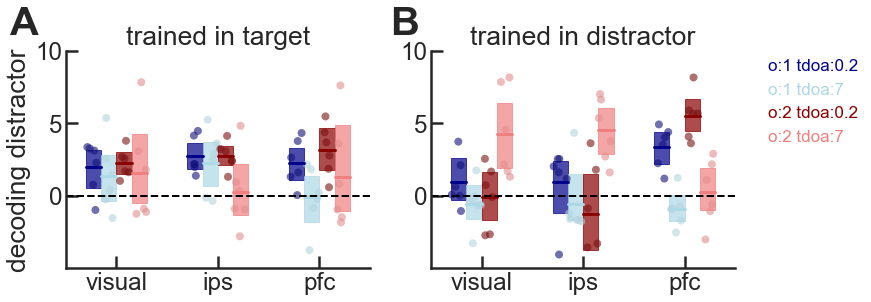

In [59]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)



f.text(0.06, 0.97, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)
f.text(0.5, 0.97, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)



plt.subplot(121)

linares_plot(x='region', y='decoding', hue='condition_label', order=['visual', 'ips', 'pfc'], 
            hue_order=['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7'],
            df=conditions_distractor.loc[conditions_distractor['training_item']=='target'], 
            palette=['darkblue', 'lightblue', 'darkred', 'lightcoral'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=8, leg=False, sep_axis=False, L_size=0)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding distractor')
plt.gca().set_ylim(-5,10)
plt.gca().set_yticks([0,5,10])
plt.title('trained in target')
plt.gca().get_legend().remove()


plt.subplot(122)


linares_plot(x='region', y='decoding', hue='condition_label', order=['visual', 'ips', 'pfc'], 
            hue_order=['o:1 tdoa:0.2', 'o:1 tdoa:7', 'o:2 tdoa:0.2', 'o:2 tdoa:7'],
            df=conditions_distractor.loc[conditions_distractor['training_item']=='distractor'], 
            palette=['darkblue', 'lightblue', 'darkred', 'lightcoral'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=8, leg=True, sep_axis=False, L_size=17, leg_inside=(0.9, 0.5))
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('')
plt.gca().set_ylim(-5,10)
plt.gca().set_yticks([0,5,10])
plt.title('trained in distractor')

Text(0.5,1,'')

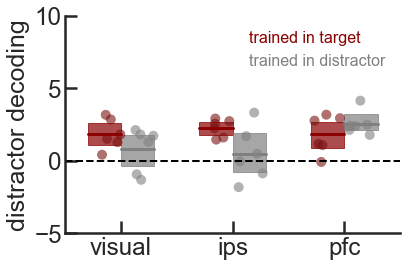

In [61]:
conditions_distractor['trianed_item_label'] = conditions_distractor['training_item'].replace(['target', 'distractor'], ['trained in target', 'trained in distractor'])

linares_plot(x='region', y='decoding', hue='trianed_item_label', order=['visual', 'ips', 'pfc'], 
             hue_order=['trained in target', 'trained in distractor'],
            df=conditions_distractor, 
            palette=['darkred', 'grey'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=500, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('distractor decoding', fontsize=25)# (std. dist.)')
plt.gca().set_ylim(-5,10)
plt.gca().set_yticks([-5,0,5,10])
plt.title('')

In [60]:
##new
for region in ['visual', 'ips', 'pfc']:
    print(region)    
    jj = conditions_distractor.loc[(conditions_distractor['training_item']=='target') & (conditions_distractor['region']==region) ].decoding.values
    print(region )
    ii = conditions_distractor.loc[(conditions_distractor['training_item']=='distractor') & (conditions_distractor['region']==region) ].decoding.values
    print(stats.ttest_ind(jj, ii))
    print('')
    

visual
visual
Ttest_indResult(statistic=2.295047696418499, pvalue=0.023080607517825022)

ips
ips
Ttest_indResult(statistic=3.2523053575712177, pvalue=0.001406634077083837)

pfc
pfc
Ttest_indResult(statistic=-1.197058691110538, pvalue=0.2331231249139923)



### How does it look without the shuffles and the shuffles alone?

In [6]:
df = df_target
df_shuff = df_target_shuff

df_time_target=[]


for cond in ['1_0.2','1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for training_item in ['target', 'distractor']:
                for t in df.times.unique(): 
                    #
                    decoding_item='target'
                    #
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['training_item']==training_item) & 
                           ( df['decoding_item']== decoding_item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['training_item']==training_item)  & 
                           ( df_shuff['decoding_item']== decoding_item) ].decoding
                    #
                    #decoding_ = (dec_sig.decoding.iloc[0]  - dec_shuff.mean()) / dec_shuff.std()
                    decoding_ = dec_sig.decoding.iloc[0] # - dec_shuff.mean()
                    pval_shuff = permutation_test([dec_sig.decoding.iloc[0]], list(dec_shuff), method='approximate', num_rounds=1000, seed=0)
                    #
                    df_time_target.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], training_item, decoding_item, pval_shuff] )   
                    ####)
#
df_time_target_noshuff = pd.DataFrame(df_time_target)
df_time_target_noshuff.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'training_item', 'decoding_item', 'pval']

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


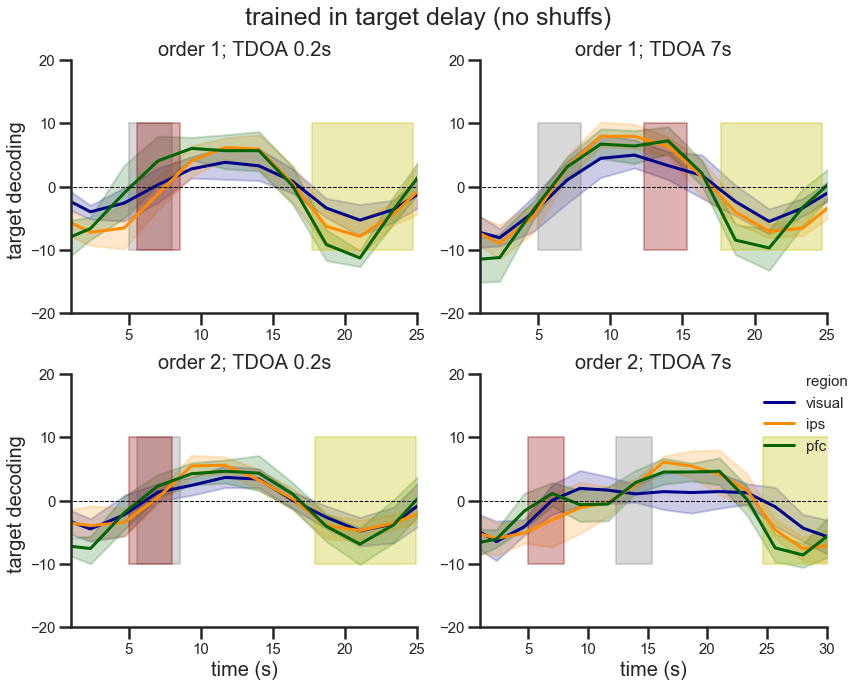

In [7]:
df_x = df_time_target_noshuff.loc[df_time_target_noshuff['training_item']=='target']
tiemcourse_c(df_x , 'trained in target delay (no shuffs)', ylims=[-20,20])

In [9]:
f = df_target
df_shuff = df_target_shuff

df_time_target=[]


for cond in ['1_0.2','1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for training_item in ['target', 'distractor']:
                for t in df.times.unique(): 
                    #
                    decoding_item='target'
                    #
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['training_item']==training_item) & 
                           ( df['decoding_item']== decoding_item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['training_item']==training_item)  & 
                           ( df_shuff['decoding_item']== decoding_item) ].decoding
                    #
                    #decoding_ = (dec_sig.decoding.iloc[0]  - dec_shuff.mean()) / dec_shuff.std()
                    decoding_ =  dec_shuff.mean()
                    pval_shuff = permutation_test([dec_sig.decoding.iloc[0]], list(dec_shuff), method='approximate', num_rounds=1000, seed=0)
                    #
                    df_time_target.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], training_item, decoding_item, pval_shuff] )   
                    ####)
#
df_time_target_justshuff = pd.DataFrame(df_time_target)
df_time_target_justshuff.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'training_item', 'decoding_item', 'pval']

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


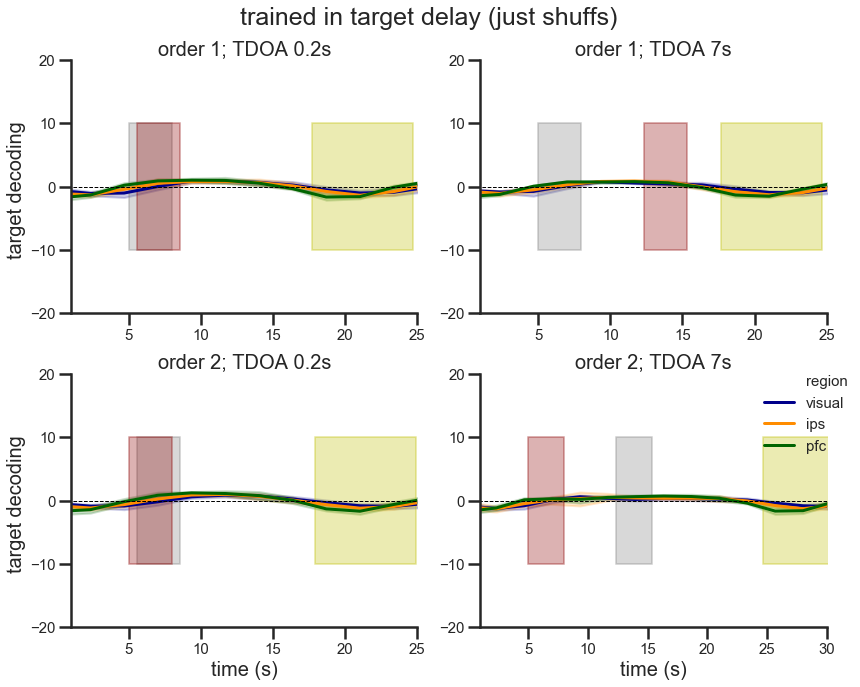

In [10]:
df_x = df_time_target_justshuff.loc[df_time_target_justshuff['training_item']=='target']
tiemcourse_c(df_x , 'trained in target delay (just shuffs)', ylims=[-20,20])